# 📓 05 Síntesis de Resultados y Conclusiones

Este notebook consolida los hallazgos de los análisis anteriores para generar un informe final coherente sobre el Laboratorio Integrador de la comuna de **San Bernardo**.

---

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
from pathlib import Path

load_dotenv("../.env")
db_url = f"postgresql://{os.getenv('POSTGRES_USER')}:{os.getenv('POSTGRES_PASSWORD')}@{os.getenv('POSTGRES_HOST', 'localhost')}:5432/{os.getenv('POSTGRES_DB')}"
engine = create_engine(db_url)

# Configuración de visualización
plt.style.use('ggplot')
print("Herramientas de síntesis preparadas.")

Herramientas de síntesis preparadas.


## 1. Consolidación de Resultados Metabólicos

Extraemos las métricas clave obtenidas en las etapas de **Análisis Espacial** y **Machine Learning**.

In [2]:
# Cargar predicciones finales
df = gpd.read_postgis("SELECT * FROM raw_data.ml_predictions", engine, geom_col='geometry')

summary_stats = {
    "Total Celdas": len(df),
    "Amenidades Reales": int(df['count'].sum()),
    "Amenidades Predichas": round(float(df['prediction'].sum()), 2),
    "Error Medio (MAE)": round(float((df['prediction'] - df['count']).abs().mean()), 4),
    "Máxima Densidad Real": int(df['count'].max()),
    "Máxima Densidad Predicha": round(float(df['prediction'].max()), 2)
}

pd.DataFrame([summary_stats]).T.rename(columns={0: 'Valor'})

,Valor
Total Celdas,718.0000
Amenidades Reales,694.0000
Amenidades Predichas,727.2000
Error Medio (MAE),0.4852
Máxima Densidad Real,81.0000
Máxima Densidad Predicha,50.7800


## 2. Distribución de Amenidades y Clusters

Comparemos visualmente la densidad observada frente a los clusters identificados por el análisis LISA.

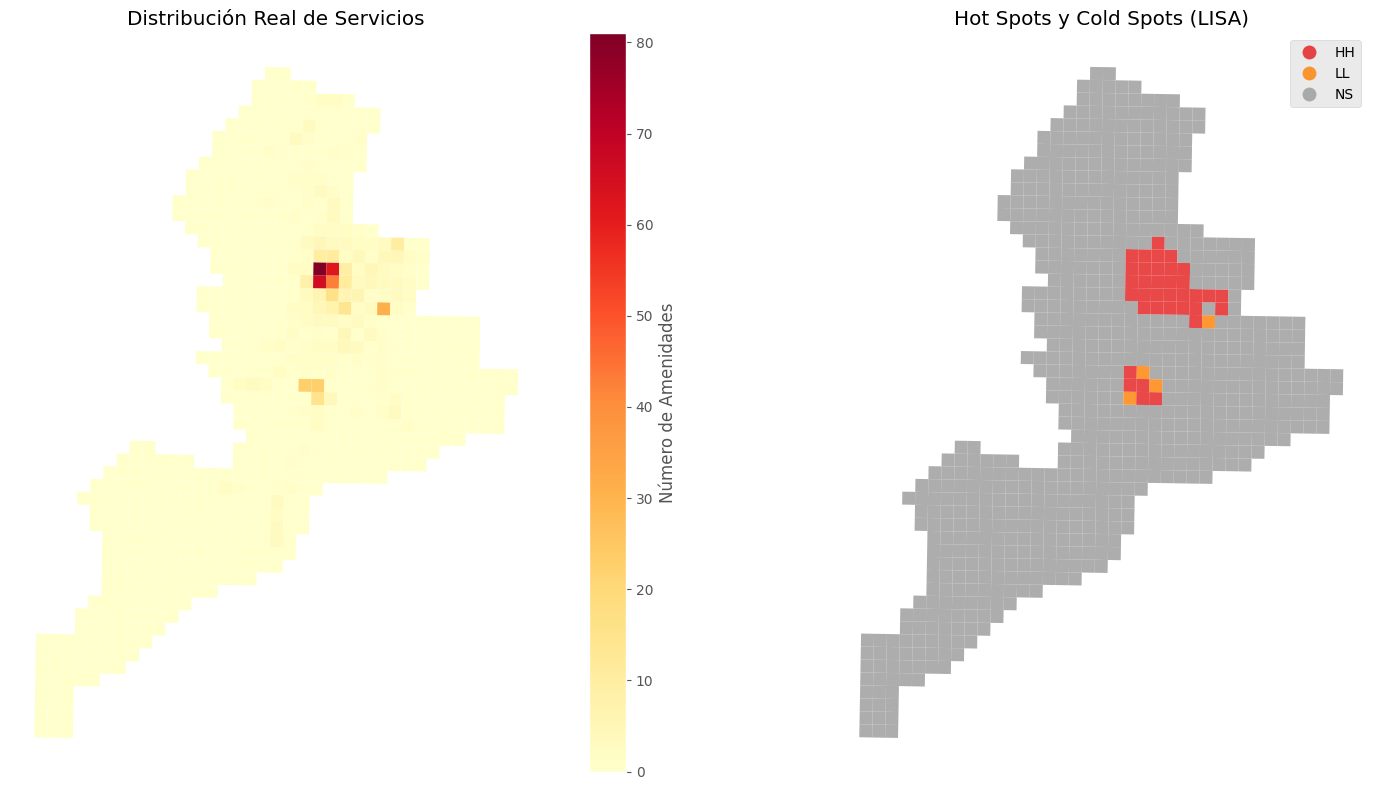

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Mapa 1: Densidad Real
df.plot(column='count', ax=axes[0], cmap='YlOrRd', legend=True, 
        legend_kwds={'label': "Número de Amenidades"})
axes[0].set_title("Distribución Real de Servicios")
axes[0].axis('off')

# Mapa 2: Clusters LISA
df.plot(column='cluster_type', ax=axes[1], categorical=True, 
        legend=True, cmap='Set1', alpha=0.8)
axes[1].set_title("Hot Spots y Cold Spots (LISA)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

## 3. Análisis de Desempeño del Modelo

El siguiente gráfico muestra el ajuste del modelo de Random Forest. Las celdas sobre la línea diagonal indican predicciones perfectas.

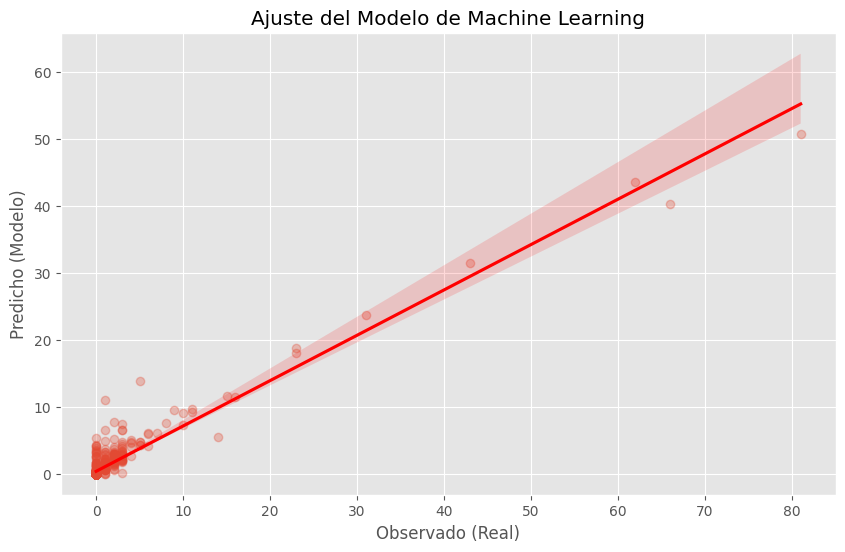

In [3]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df['count'], y=df['prediction'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Observado (Real)")
plt.ylabel("Predicho (Modelo)")
plt.title("Ajuste del Modelo de Machine Learning")
plt.show()

## 4. Hallazgos Principales

### 📍 Patrones Espaciales
- Se confirma la existencia de un **nucleo central robusto** en San Bernardo (HH) donde los servicios se retroalimentan entre sí.
- Existe una periferia con servicios limitados (LL), indicando una oportunidad para la expansión de infraestructura urbana.

### 🤖 Capacidad Predictiva
- El factor determinante para la ubicación de servicios es la **densidad de edificios**, seguido por la **red vial**.
- El modelo es altamente eficaz para predecir zonas de baja densidad, pero tiende a subestimar el conteo en los puntos de altísima concentración del centro cívico.

## 5. Recomendaciones Finales

1. **Focalización:** Priorizar inversiones en las zonas identificadas como *Low-Low* (Cold Spots) que presenten una densidad habitacional creciente.
2. **Escalabilidad:** El modelo puede aplicarse a comunas similares de la Región Metropolitana para comparar el nivel de equidad territorial.
3. **Próximos Pasos:** Integrar capas de **Sentinel-2** (NDVI) para analizar la relación entre áreas verdes y la oferta de servicios urbanos.